In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False


df = pd.read_csv(r'C:\Users\26508\Downloads\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df = df.drop_duplicates()
df.shape

(891, 12)

In [11]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
df.shape

(775, 8)

In [15]:
df = df.dropna()
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].str.upper()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S


D:\Users\26508\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27888 (\N{CJK UNIFIED IDEOGRAPH-6CF0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\26508\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22374 (\N{CJK UNIFIED IDEOGRAPH-5766}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\26508\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\26508\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Users\26508\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu San

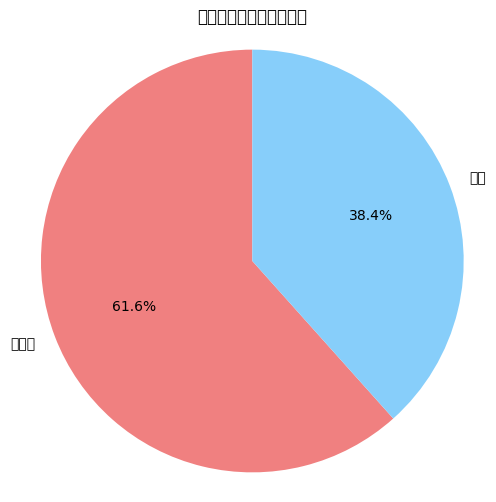

In [34]:
survived_counts = df['Survived'].value_counts()
labels = ['未存活', '存活']
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('泰坦尼克号乘客生还比例')
plt.axis('equal')
plt.show()

C:\Users\26508\AppData\Local\Temp\ipykernel_7296\2820752801.py:8: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\26508\AppData\Local\Temp\ipykernel_7296\2820752801.py:8: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\26508\AppData\Local\Temp\ipykernel_7296\2820752801.py:8: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\26508\AppData\Local\Temp\ipykernel_7296\2820752801.py:8: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\26508\AppData\Local\Temp\ipykernel_7296\2820752801.py:8: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\26508\AppData\Local\Temp\ipykernel_7296\2820752801.py:8: UserWarning: Glyph 21516 (\N{CJK UNIFIE

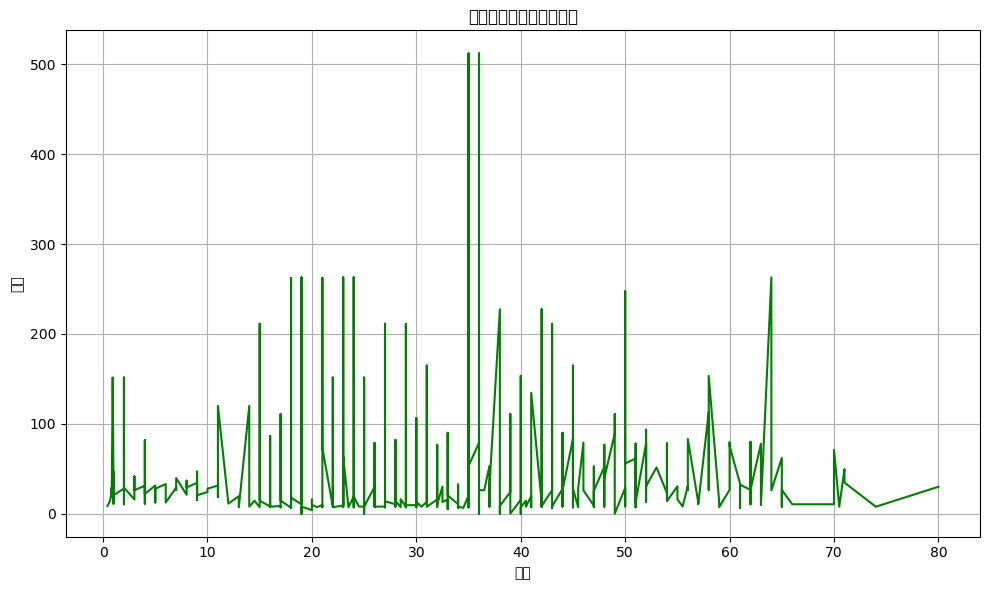

In [36]:
df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Age'].values, df_sorted['Fare'].values, color='green')
plt.xlabel('年龄')
plt.ylabel('票价')
plt.title('不同年龄乘客的票价趋势')
plt.grid(True)
plt.tight_layout()
plt.show()